In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# I import my package:

import averagedistorsion as ad

font = {'size': 14}
  
# using rc function
plt.rc('font', **font)

In [2]:
rules = [#ad.RuleAlwaysWorst(),
         #ad.RuleLottery(), 
         #ad.RuleDictatorRandom(),
         #ad.RuleEgalitarian(),
         #ad.RuleVeto(), 
         ad.RulePlurality(), 
         ad.RulePluralityVeto(),
         ad.RuleSTV(), 
         ad.RuleHarmonic(), 
         ad.RuleHalfApproval(), 
         ad.RuleRankedPairs(),
         ad.RuleCopeland(),
         #ad.RuleMedian(), 
         ad.RuleBorda(), 
         ad.RuleRandomVoterUtility(),
         #ad.RuleNashProduct()
         ]

n_candidates = 2
n_irrelevant_candidates = 8
n_voters = 20
n_tries = 10000

In [3]:
experiment = ad.ExperimentIrrelevantCandidates(rules, 
                                                n_candidates=n_candidates,
                                                n_irrelevant_candidates=n_irrelevant_candidates,
                                                n_voters=n_voters,
                                                n_tries=n_tries)

# Partie 1 : Irrelevant

100%|██████████| 9/9 [03:40<00:00, 24.53s/it]


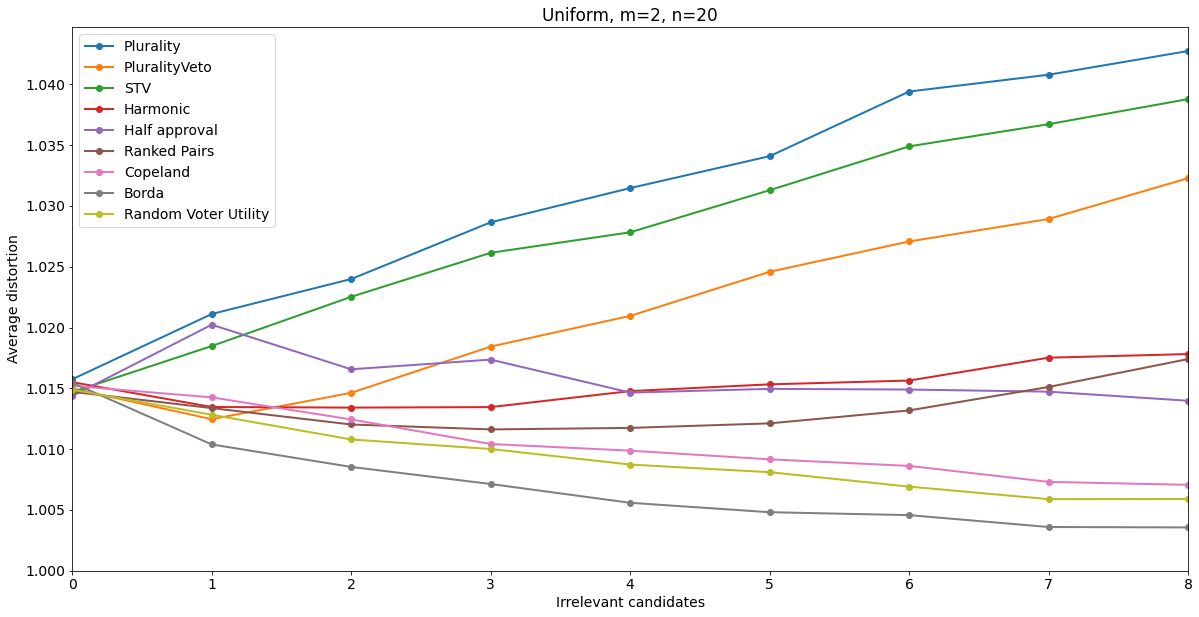

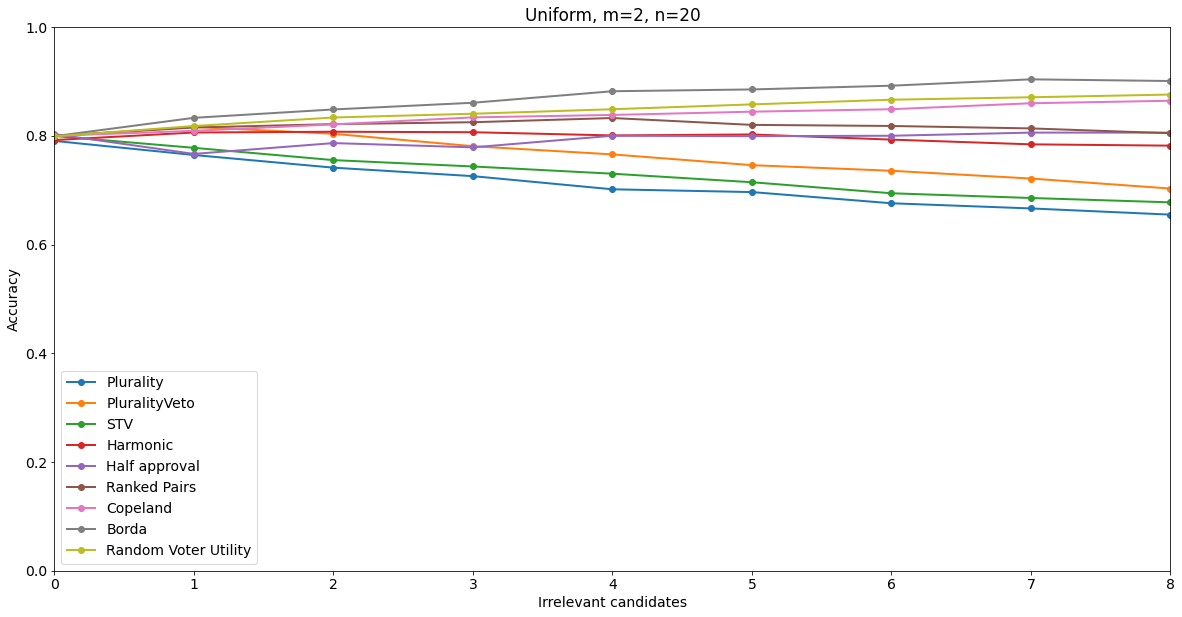

In [5]:
experiment(ad.ModelUniform())
experiment.show_distortion("Uniform")
experiment.show_accuracy("Uniform")
experiment.save_results("results/irrelevant_experiment_uniform.csv")

100%|██████████| 9/9 [03:39<00:00, 24.39s/it]


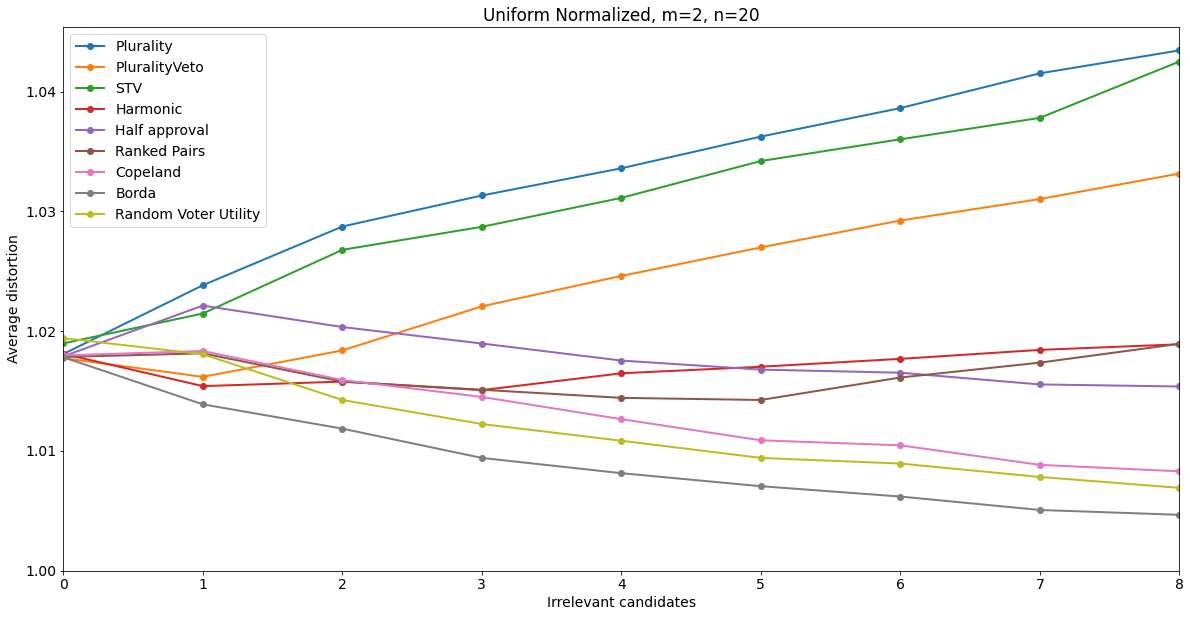

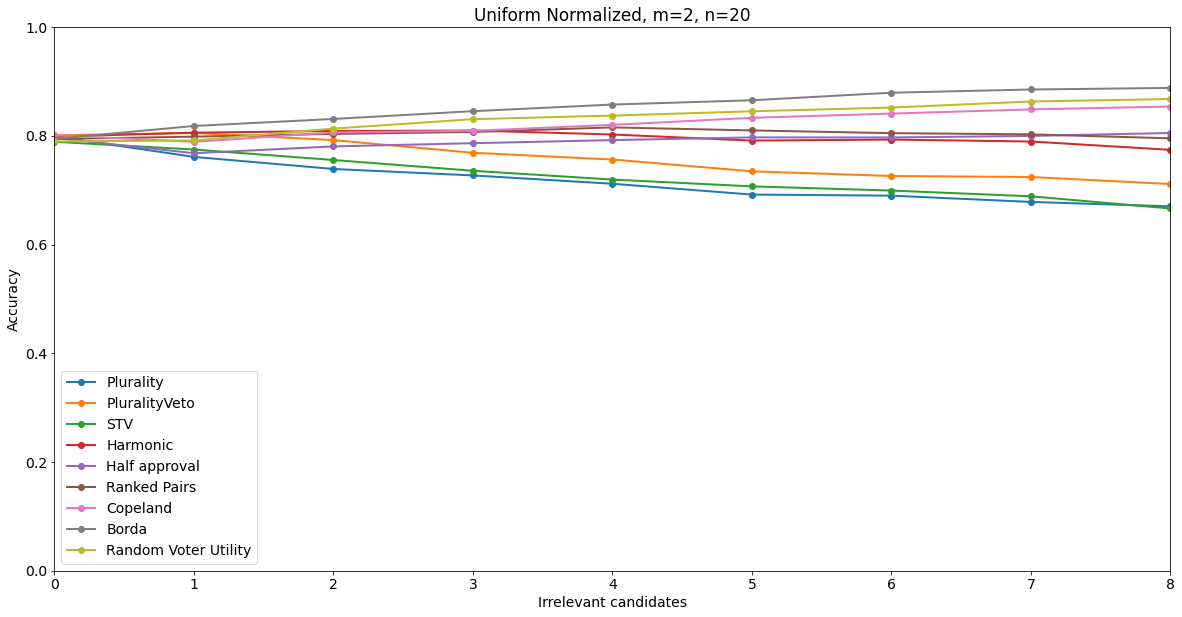

In [6]:
experiment(ad.ModelUniformNormalized())
experiment.show_distortion("Uniform Normalized")
experiment.show_accuracy("Uniform Normalized")
experiment.save_results("results/irrelevant_experiment_uniform_normalized.csv")

100%|██████████| 9/9 [05:36<00:00, 37.43s/it]


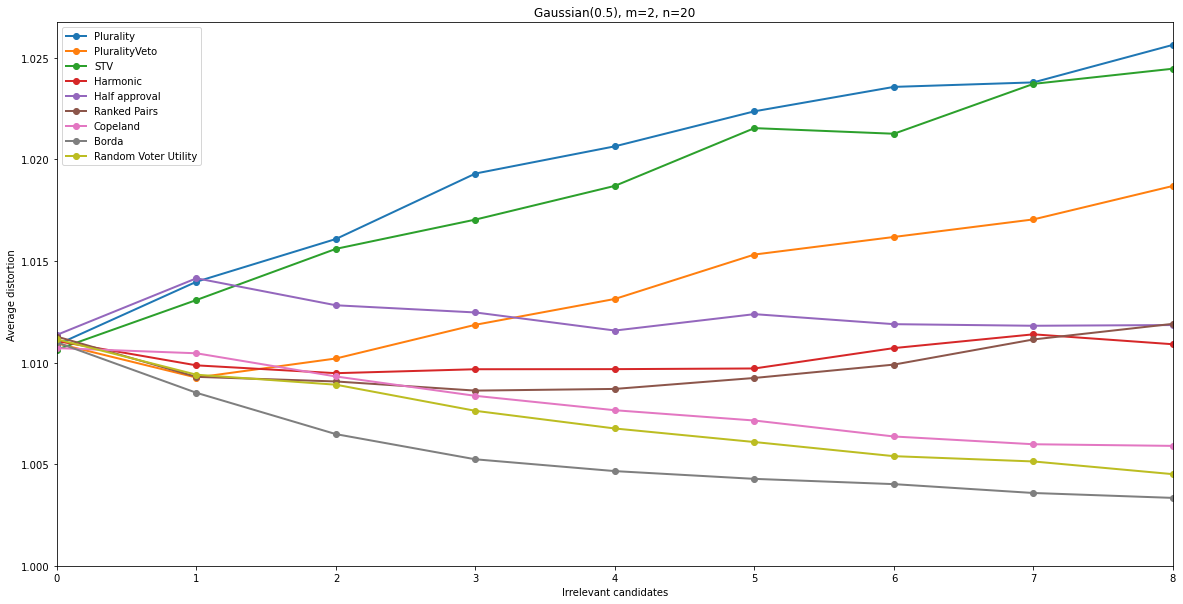

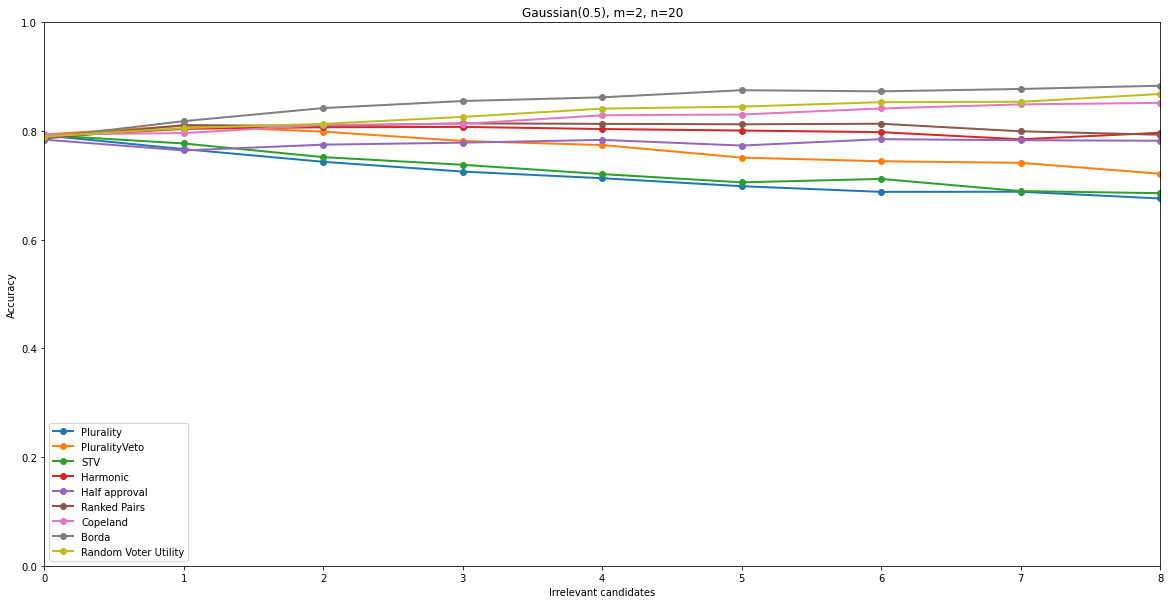

In [5]:
experiment(ad.ModelGaussian(phi=0.2,center=0.5))
experiment.show_distortion("Gaussian(0.5)")
experiment.show_accuracy("Gaussian(0.5)")
experiment.save_results("results/irrelevant_experiment_gaussian_neutral.csv")

100%|██████████| 12/12 [08:26<00:00, 42.24s/it]


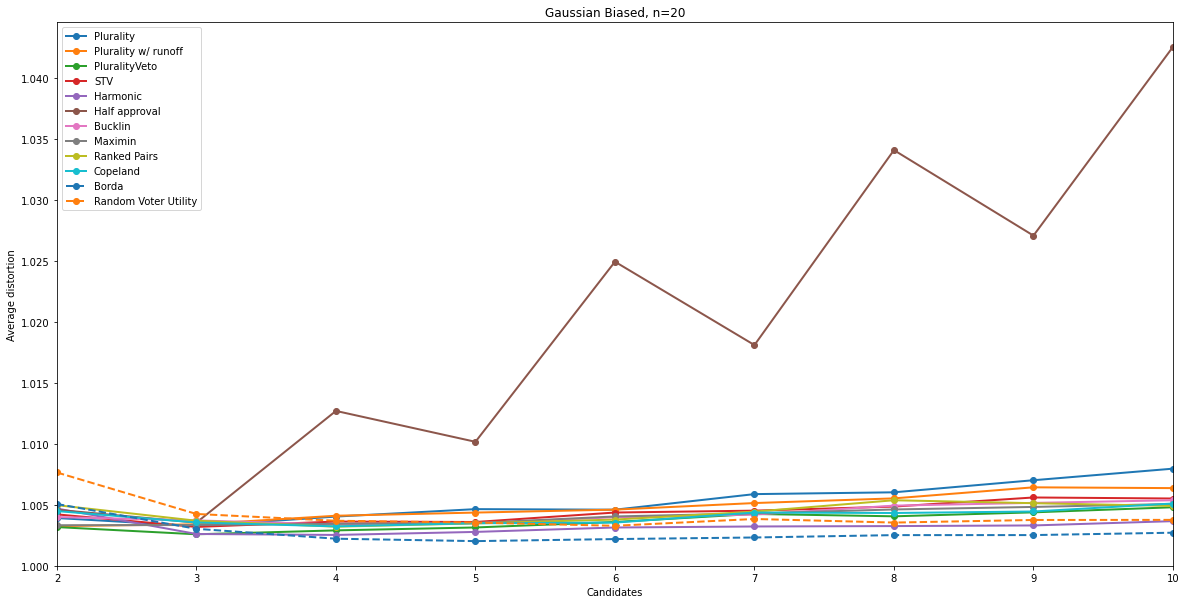

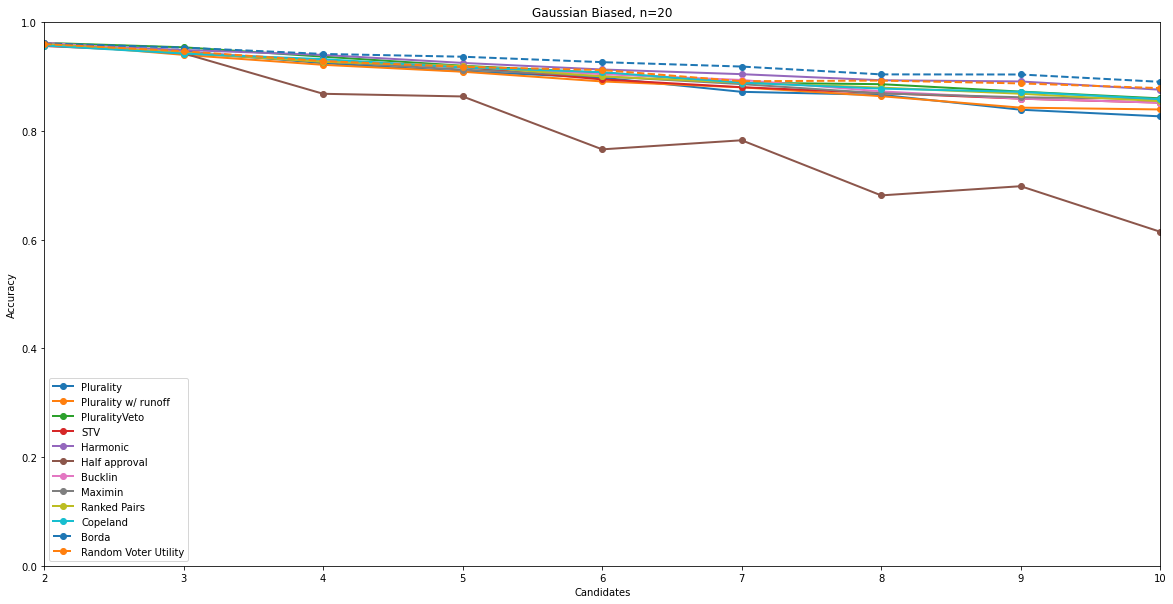

In [26]:
experiment(ad.ModelGaussian(phi=0.2))
experiment.show_distortion("Gaussian Biased")
experiment.show_accuracy("Gaussian Biased")
experiment.save_results("results/irrelevant_experiment_gaussian_biaised.csv")

## Real datasets

In [7]:
PATH = r"C:\Users\Theo Delemazure\Documents\Thèse\Avril 2022\social"
restaurants = np.genfromtxt(PATH+"\CD-00003-00000002.csv", delimiter=',', dtype=int)[1:,1:]
bars = np.genfromtxt(PATH+"\CD-00003-00000003.csv", delimiter=',', dtype=int)[1:,1:]

100%|██████████| 9/9 [05:19<00:00, 35.51s/it]


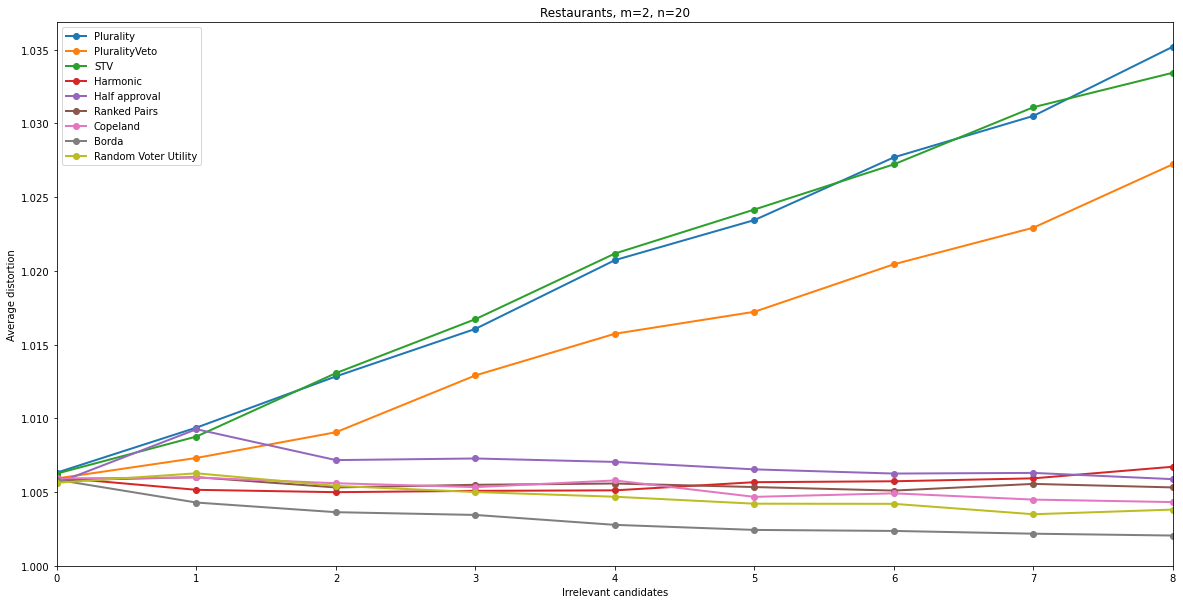

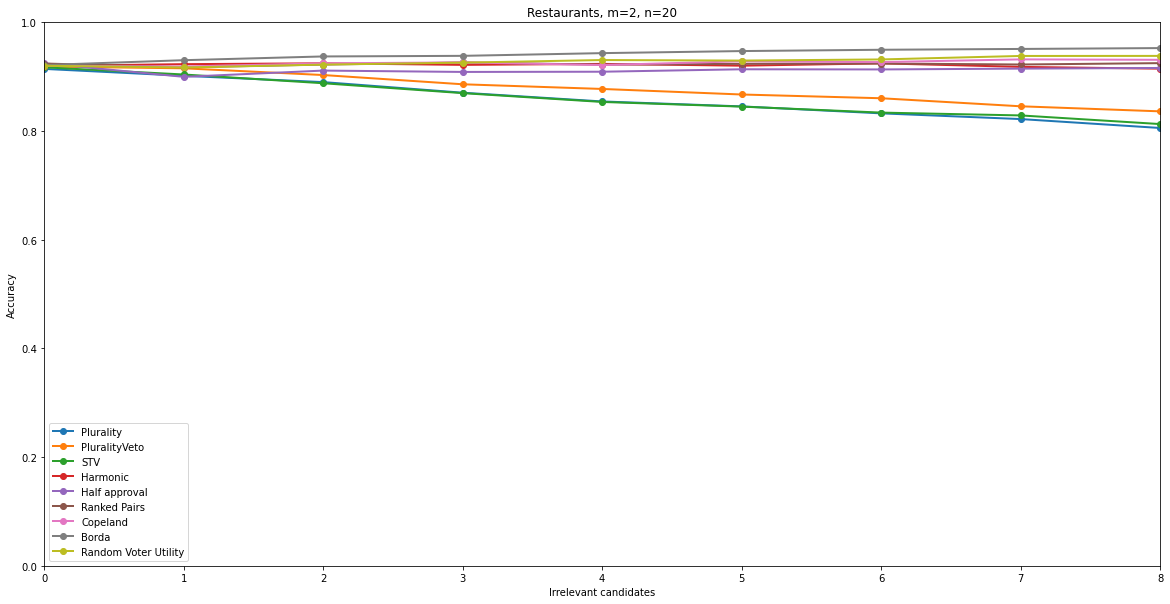

In [8]:
experiment(ad.ModelFromDataset(restaurants, noise=0.1))
experiment.show_distortion("Restaurants")
experiment.show_accuracy("Restaurants")
experiment.save_results("results/irrelevant_experiment_restaurants.csv")

100%|██████████| 9/9 [05:23<00:00, 35.96s/it]


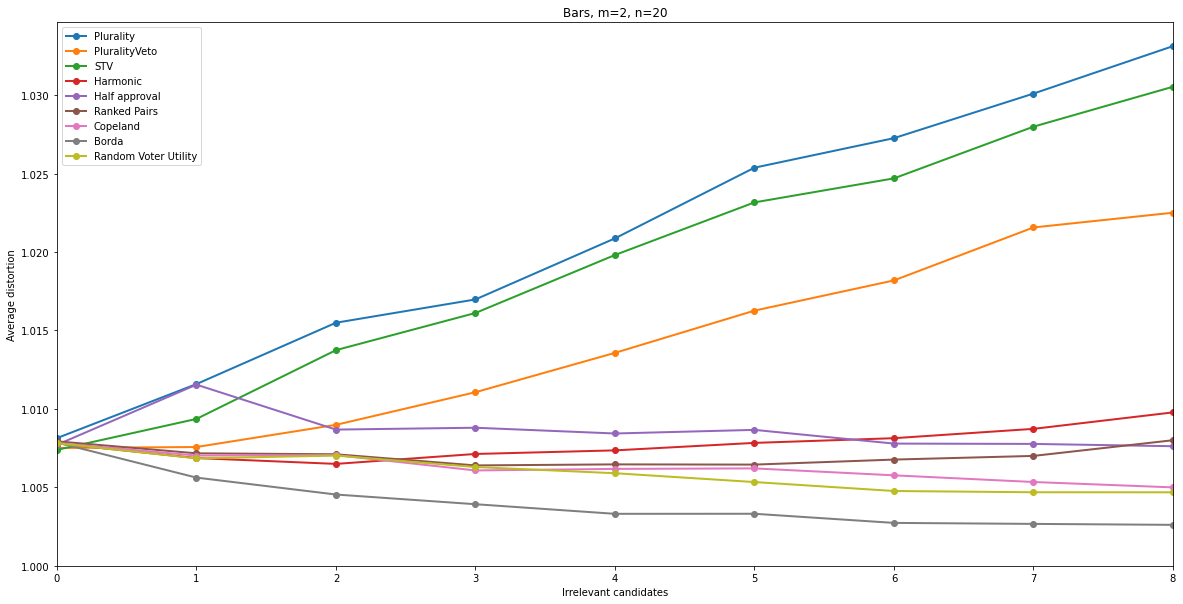

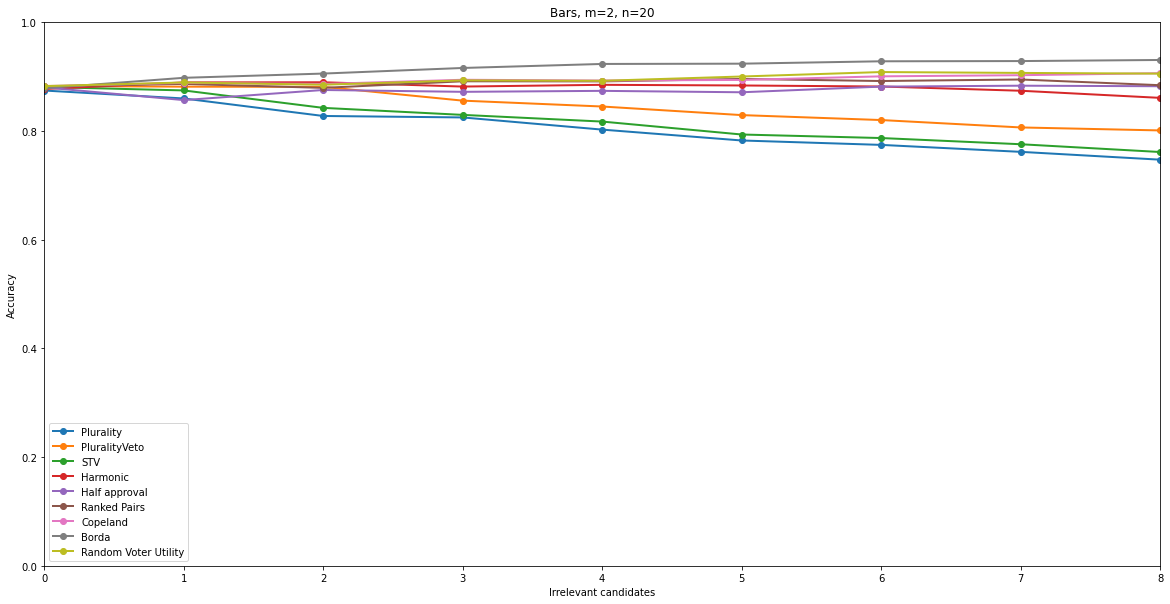

In [9]:
experiment(ad.ModelFromDataset(bars, noise=0.1))
experiment.show_distortion("Bars")
experiment.show_accuracy("Bars")
experiment.save_results("results/irrelevant_experiment_bars.csv")

In [10]:
with open('../../../Mai 2022/opinions.json', 'r') as f:
    dict_opinions = json.load(f)
candidats = ['Philippe Poutou', 'Nathalie Arthaud', 'Fabien Roussel', 'Jean-Luc Mélenchon', 'Anne Hidalgo', 'Yannick Jadot', 'Emmanuel Macron', 'Jean Lassalle', 'Valérie Pecresse', 'Nicolas Dupont-Aignan', 'Marine Le Pen', 'Eric Zemmour']
votes = np.array([e['opinions'] for e in dict_opinions])
president = votes /20

100%|██████████| 9/9 [06:07<00:00, 40.82s/it]


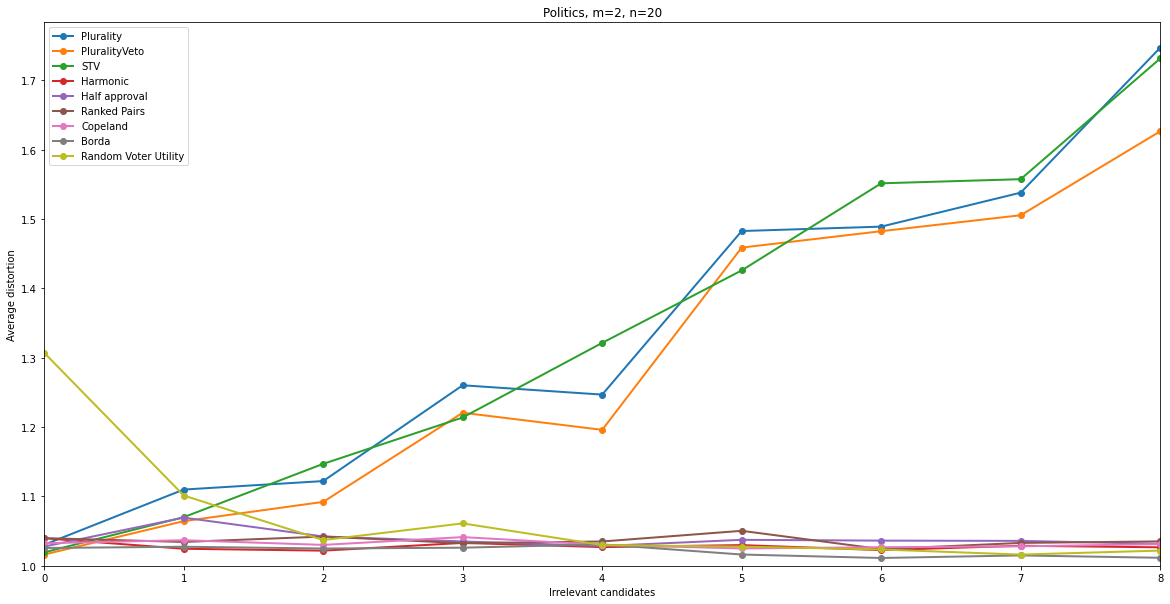

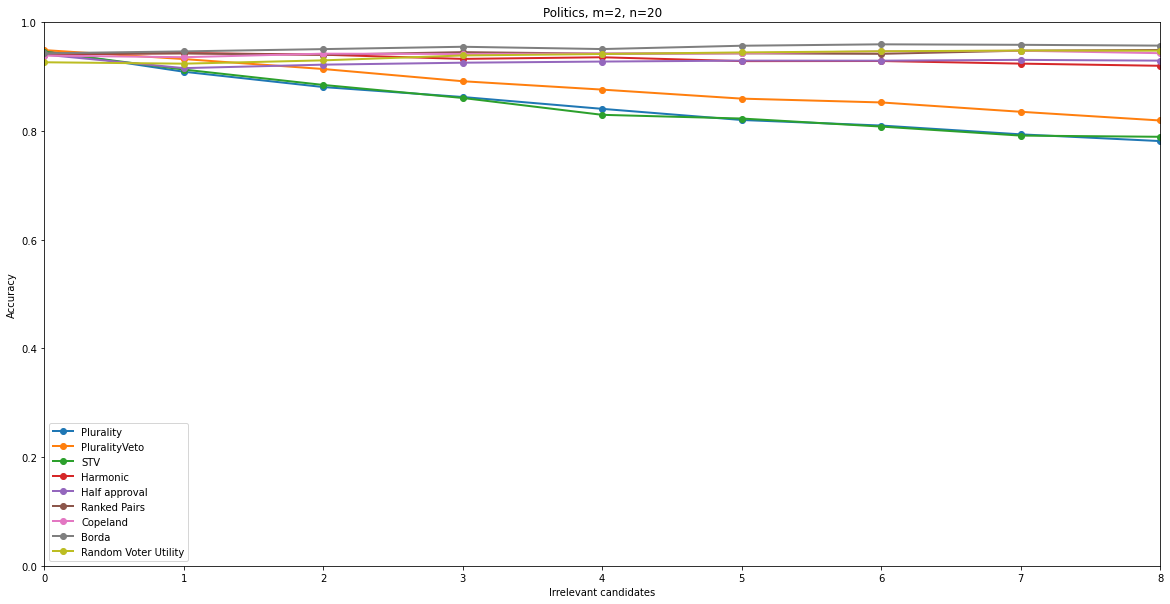

In [11]:
experiment(ad.ModelFromDataset(president, noise=0.005))
experiment.show_distortion("Politics")
experiment.show_accuracy("Politics")
experiment.save_results("results/irrelevant_experiment_politics.csv")

# Partie 2 : Increase number of relevant alternatives

In [16]:
rules = [#ad.RuleAlwaysWorst(),
         #ad.RuleLottery(), 
         #ad.RuleDictatorRandom(),
         #ad.RuleEgalitarian(),
         #ad.RuleVeto(), 
         ad.RulePlurality(), 
         ad.RulePluralityWithRunoff(), 
         ad.RulePluralityVeto(),
         ad.RuleSTV(), 
         ad.RuleHarmonic(), 
         ad.RuleHalfApproval(), 
         ad.RuleBucklin(),
         ad.RuleMaximin(), 
         ad.RuleRankedPairs(),
         ad.RuleCopeland(),
         #ad.RuleMedian(), 
         ad.RuleBorda(), 
         ad.RuleRandomVoterUtility(),
         #ad.RuleNashProduct()
         ]


n_candidates = 10
n_voters = 20
n_tries = 10000

In [17]:
experiment = ad.ExperimentRelevantCandidates(rules, 
                                             n_candidates=n_candidates,
                                             n_voters=n_voters,
                                             n_tries=n_tries)

100%|██████████| 12/12 [06:40<00:00, 33.34s/it]


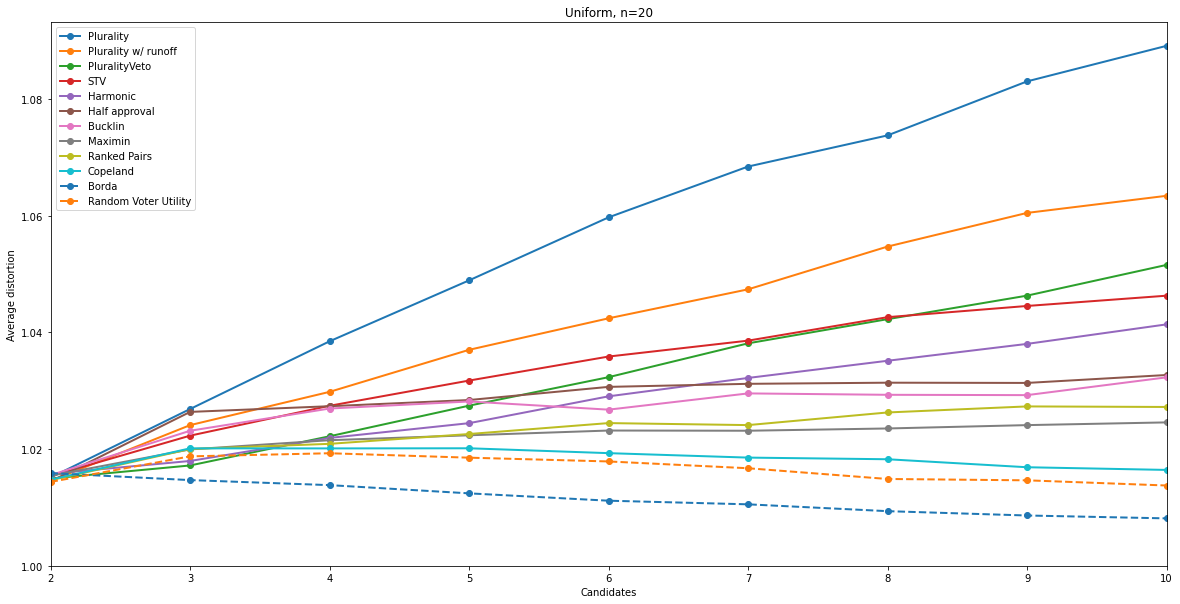

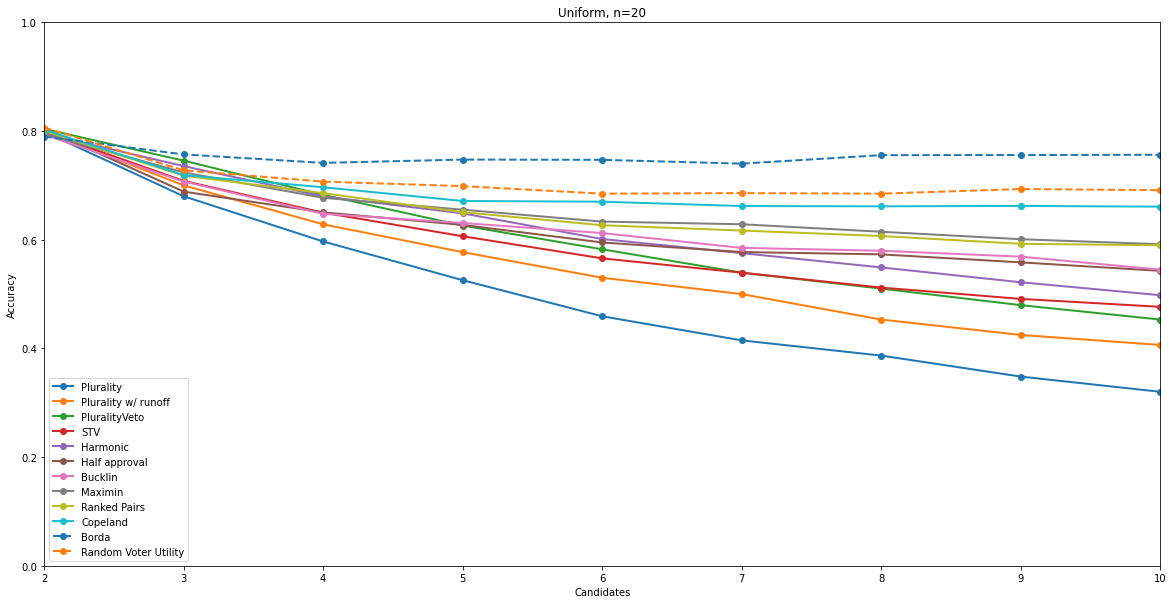

In [18]:
experiment(ad.ModelUniform())
experiment.show_distortion("Uniform")
experiment.show_accuracy("Uniform")
experiment.save_results("results/relevant_experiment_uniform.csv")

100%|██████████| 12/12 [06:40<00:00, 33.39s/it]


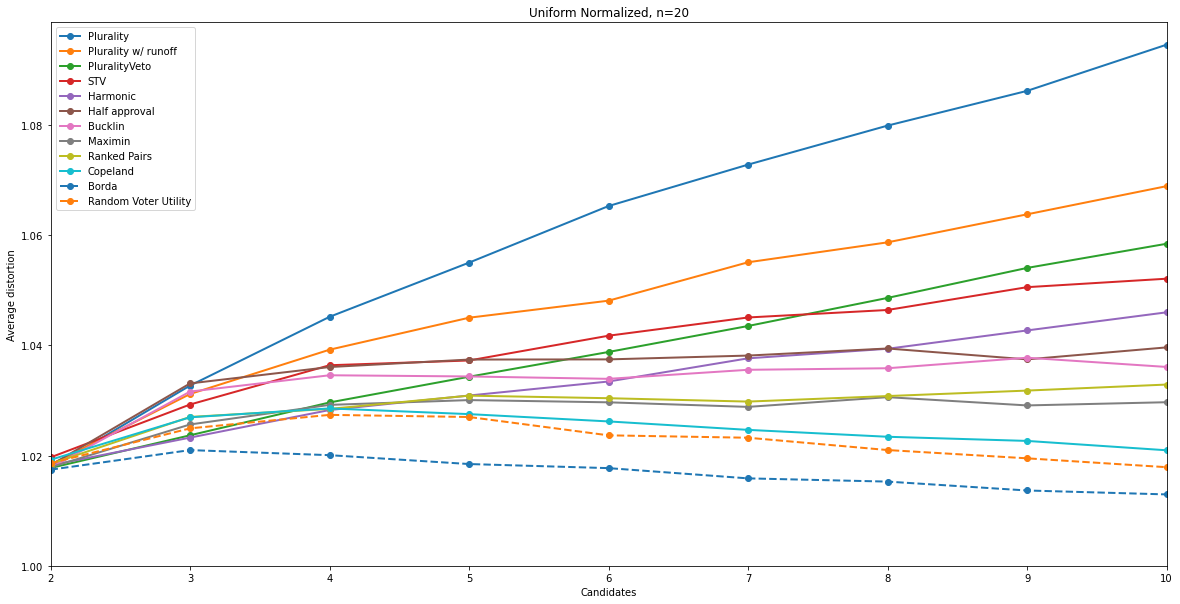

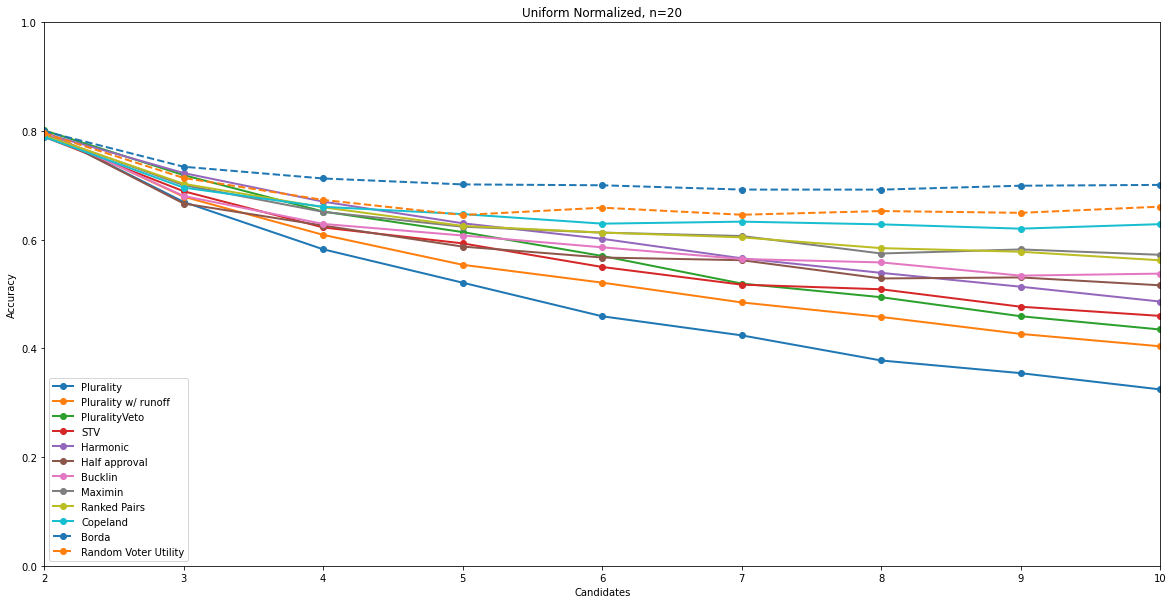

In [19]:
experiment(ad.ModelUniformNormalized())
experiment.show_distortion("Uniform Normalized")
experiment.show_accuracy("Uniform Normalized")
experiment.save_results("results/relevant_experiment_uniform_normalized.csv")

100%|██████████| 12/12 [07:53<00:00, 39.43s/it]


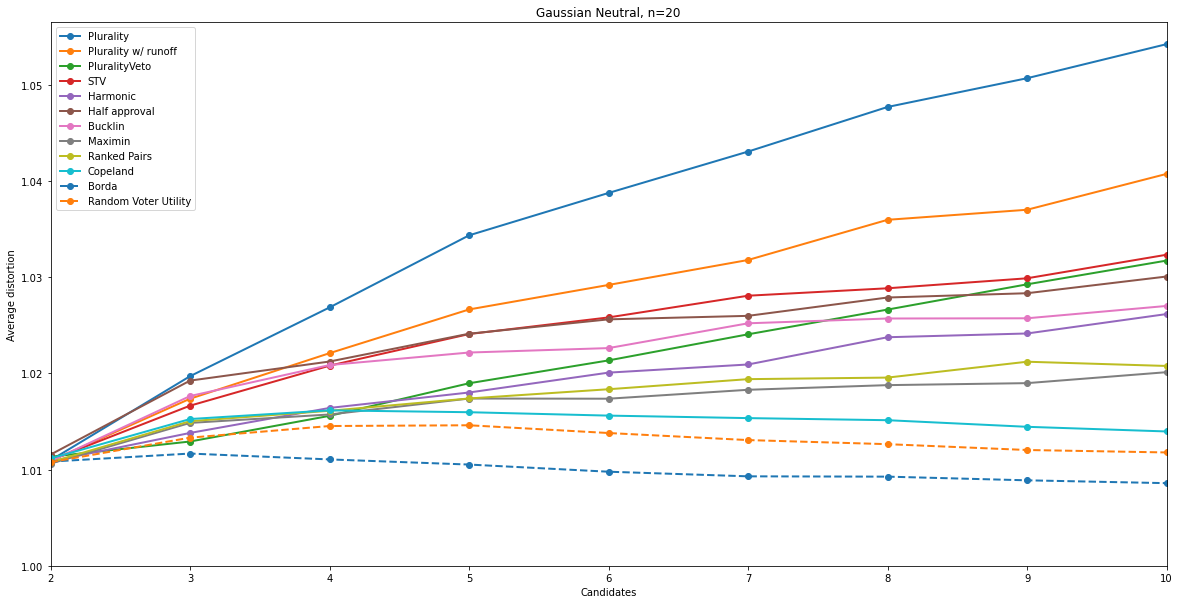

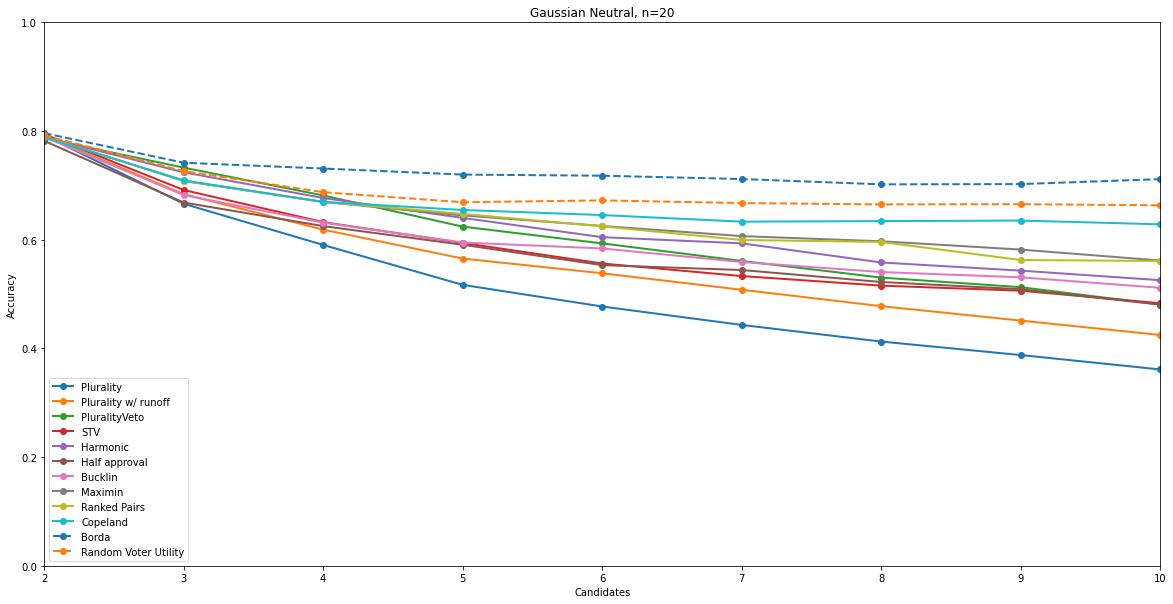

In [20]:
experiment(ad.ModelGaussian(phi=0.2,center=0.5))
experiment.show_distortion("Gaussian Neutral")
experiment.show_accuracy("Gaussian Neutral")
experiment.save_results("results/relevant_experiment_gaussian_neutral.csv")

100%|██████████| 12/12 [08:12<00:00, 41.06s/it]


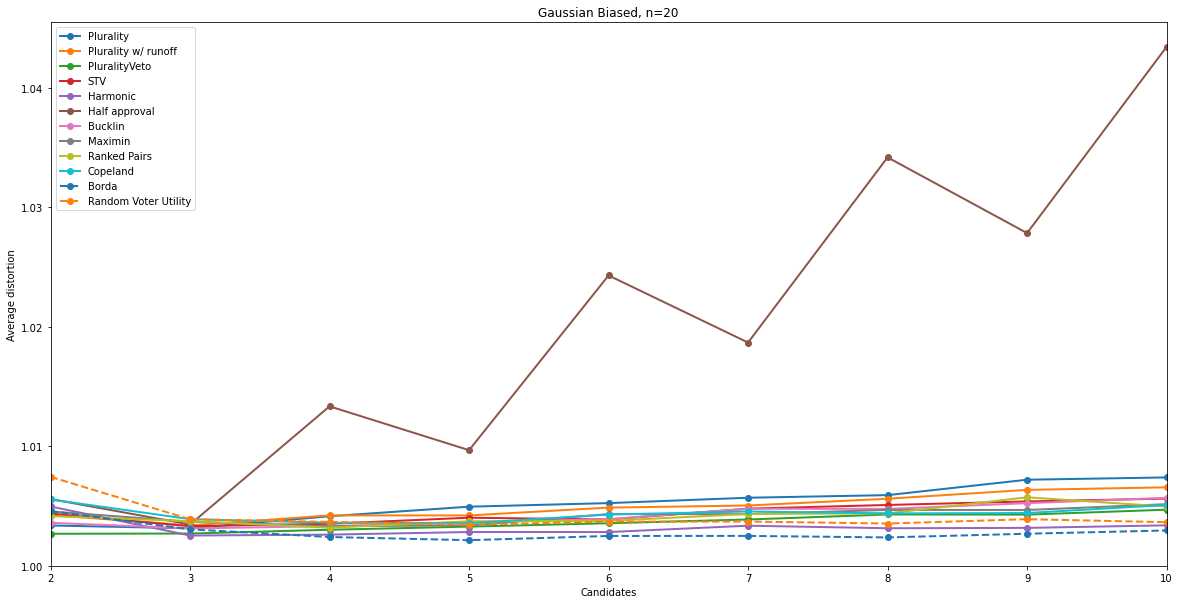

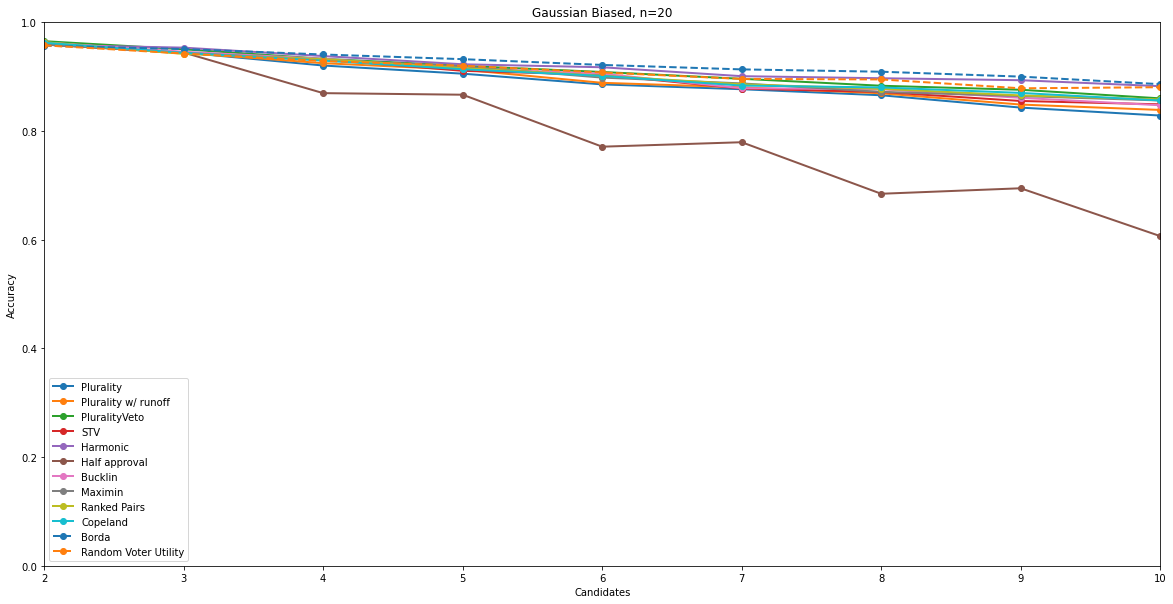

In [25]:
experiment(ad.ModelGaussian(phi=0.2))
experiment.show_distortion("Gaussian Biased")
experiment.show_accuracy("Gaussian Biased")
experiment.save_results("results/relevant_experiment_gaussian_biaised.csv")

## Real datasets

100%|██████████| 12/12 [07:28<00:00, 37.36s/it]


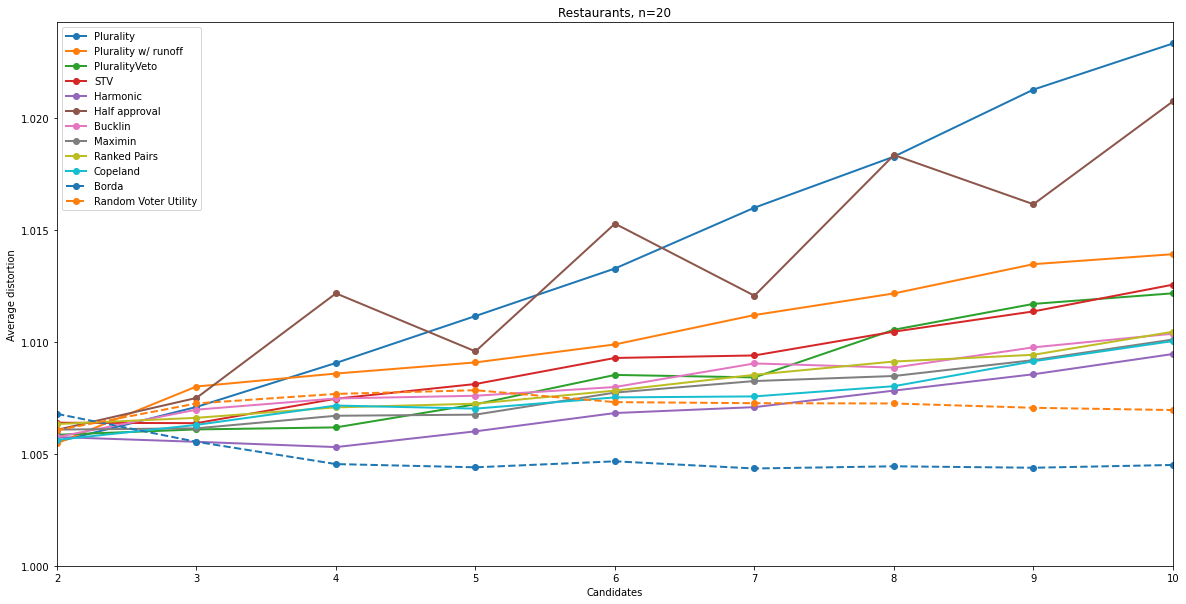

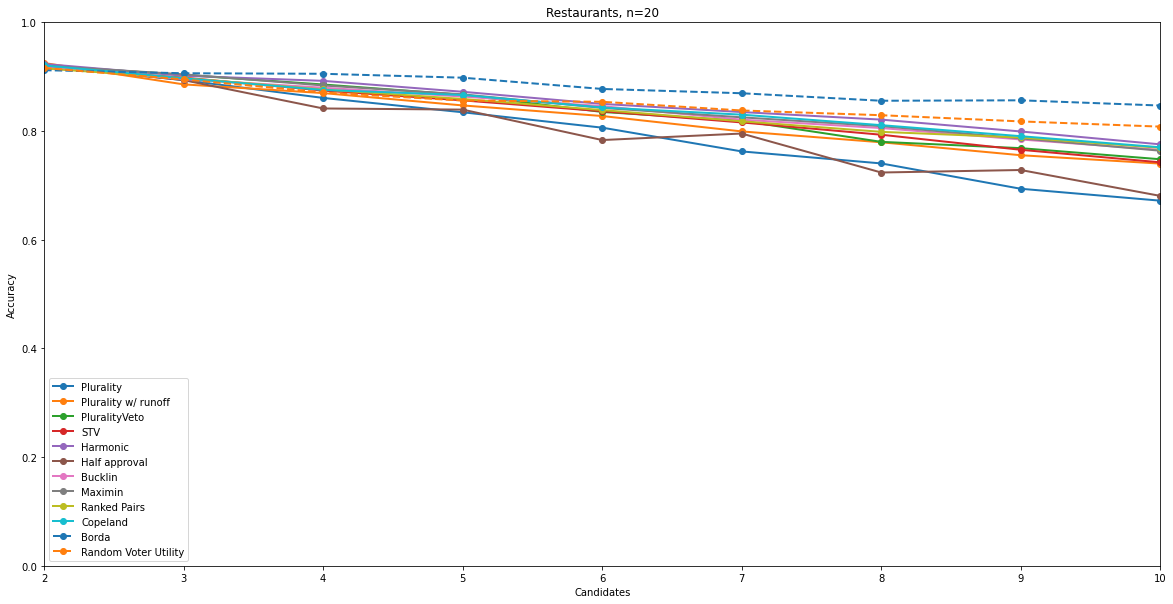

In [22]:
experiment(ad.ModelFromDataset(restaurants, noise=0.1))
experiment.show_distortion("Restaurants")
experiment.show_accuracy("Restaurants")
experiment.save_results("results/relevant_experiment_restaurants.csv")

100%|██████████| 12/12 [07:36<00:00, 38.03s/it]


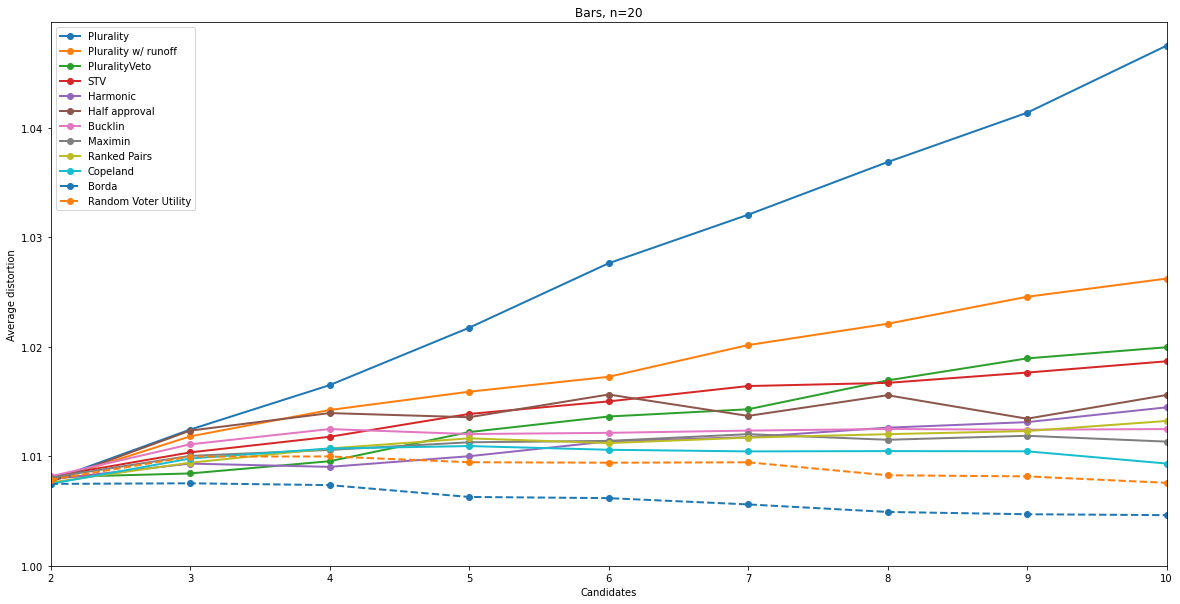

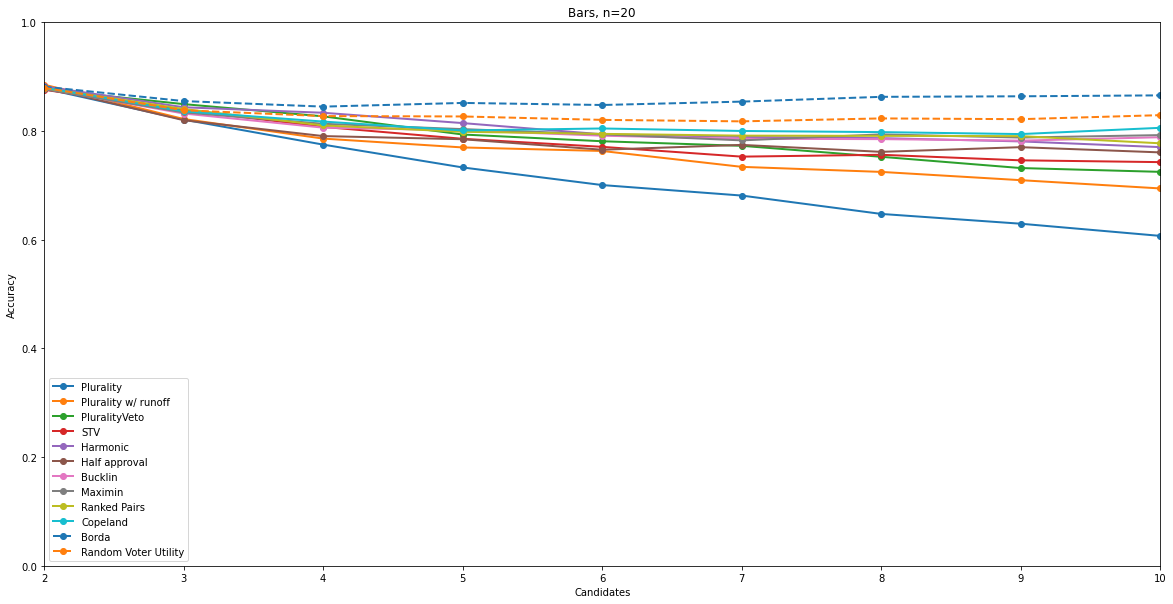

In [23]:
experiment(ad.ModelFromDataset(bars, noise=0.1))
experiment.show_distortion("Bars")
experiment.show_accuracy("Bars")
experiment.save_results("results/relevant_experiment_bars.csv")

100%|██████████| 12/12 [08:25<00:00, 42.10s/it]


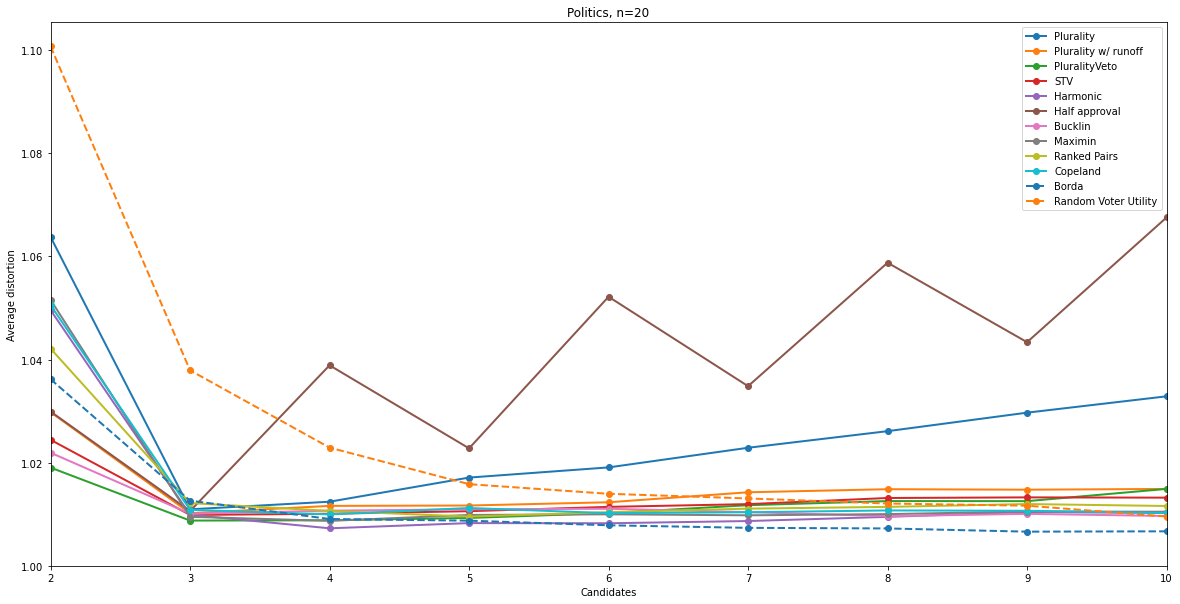

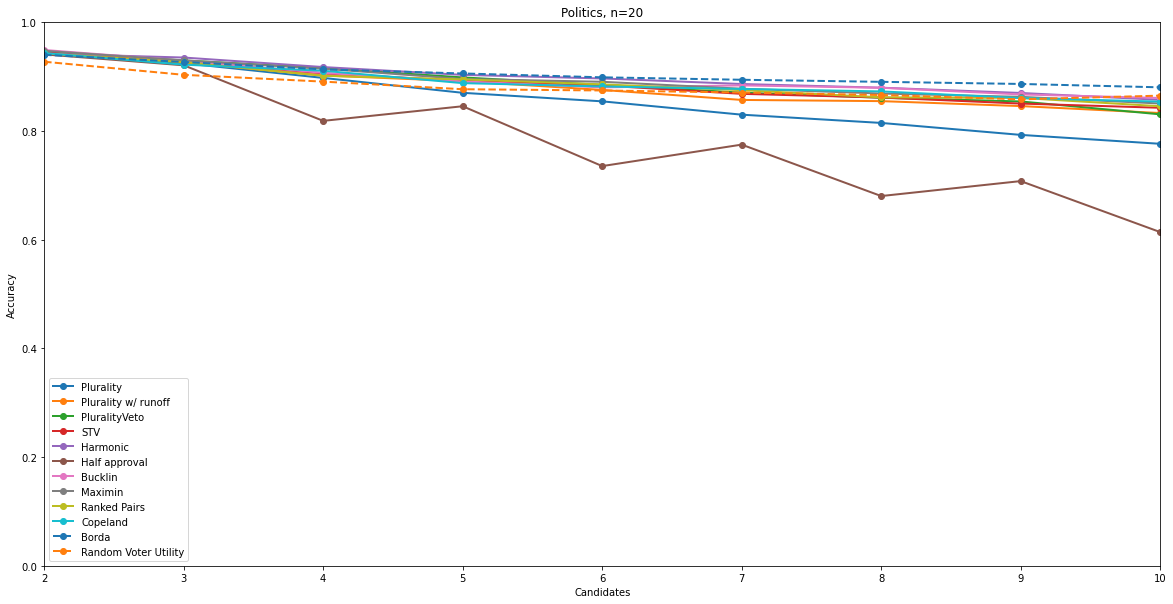

In [24]:
experiment(ad.ModelFromDataset(president, noise=0.005))
experiment.show_distortion("Politics")
experiment.show_accuracy("Politics")
experiment.save_results("results/relevant_experiment_politics.csv")